# Bias Variance Data Tradeoff

In [2]:
import itertools
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from mlxtend.evaluate import bias_variance_decomp
from sklearn.linear_model import LinearRegression

# Generate data

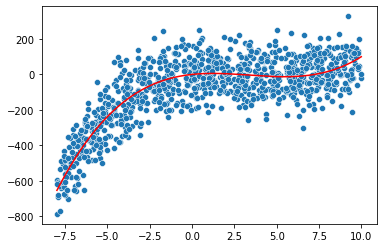

In [4]:
X = np.random.uniform(-8, 10, 1000)
noise = np.random.normal(0,100,1000)
# true function f(x) = 10x - 5x^2 + 0.5x^3
true_function = 10*X -5*X**2 + 0.5*(X**3)
y=true_function+noise
sns.scatterplot(x=X, y=y)
sns.lineplot(x=X, y=true_function, color='r')
plt.show()

In [24]:
features = X
targets = y
#split the data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

#first fit a simple linear regression
simple = LinearRegression()
simple.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

# estimate bias and variance
mse, bias, var = bias_variance_decomp(simple, X_train.reshape(-1,1),
                                      y_train, X_test.reshape(-1,1),
                                      y_test, loss='mse', num_rounds=2000, random_seed=1)
# summarize results
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)


MSE: 17758.530
Bias: 17686.863
Variance: 71.667


In [40]:
r_2 = simple.score(X_test.reshape(-1,1), y_test)
print(f'simple linear model R^2 = {r_2}')

simple linear model R^2 = 0.5072490767290517
